This practical work, on motion estimation, has 3 different parts, corresponding to three families of algorithms that we have seen in class:
- Block matching algorithms
- Optic flow
- Parametric motion estimation.

You are asked to complete the different algorithms and to try it. Also, please answer to the theoretical questions, in the notebook.

In [48]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from me_ssd import me_ssd
from displayMVF import displayMVF
from fracMc import fracMc
from PSNR import PSNR
from me_sad import me_sad
from HornSchunck import HS
from applyAffineMotion import applyAffineMotion
from angle2D import angle2D
from gradient import gradient
#from medianFilter import medianFilter

# I - Block matching algorithms
## I-1 - Unregularized algorithms
### I-1-a - Unregularized SSD-based algorithm

First, read the two images 'flower_cif_1.mat' and 'flower_cif_1.mat', which are two consecutive frames of a video sequence. You will have to estimate the motion between these frame, using block matching algorithms.

In [2]:
im1 = loadmat('flower_cif_1.mat')['im1']
im1 = im1.astype('float')
im2 = loadmat('flower_cif_2.mat')['im2']
im2 = im2.astype('float')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1543cb32c10>)

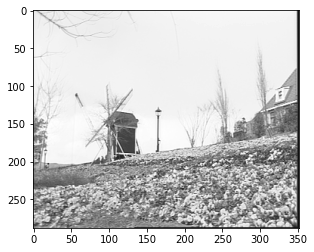

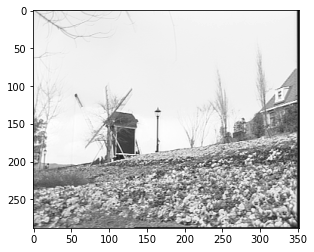

In [3]:
plt.figure(),plt.imshow(im1,cmap='gray')
plt.figure(),plt.imshow(im2,cmap='gray')

First, you will have to encode a block matching using the SSD criterion. Some default values of the algorithm are given below: the number of column and rows in each block, and the search radius.

In [4]:
brow = 16 # Number of rows per block
bcol = 16 # Number of columns per block
search_radius = 8 # Search radius

Code the me_ssd function in the me_ssd file. First, implement the unregularized function.

In [5]:
mvf_ssd,prediction =  me_ssd(im2, im1, brow, bcol, search_radius)

Show the motion vector field using the displayMVF function. Write your remarks. Are there errors? If yes, where and why?
* The image below shows that the motion vectors of some blocks, especially in the sky region, result in them being displaced from their original positions, which is incorrect. This error occurs because the distance between the two blocks is ignored and only the difference in intensities is taken into account. Therefore, it is possible to have two blocks in a homogeneous region that have very similar dissimilarity values.

Change the block size and the search area radius. How does it impact your results?
* Increasing the block size reduces the likelihood of finding a distant block with lower dissimilarity than the neighboring blocks. This results in a decrease in the number of errors in motion vectors. However, increasing the search radius increases the probability of finding more blocks that have less dissimilarity. This, in turn, increases the number of errors in motion vectors.

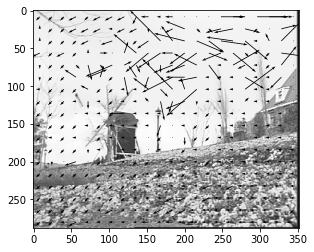

In [14]:
displayMVF(im1,mvf_ssd,brow)

Motion compensation: now that we have computed the movement vector field, we can compute the motion compensated image. Display the motion compensated image. What can you observe ?
* In this context, the block in the reference frame is moved using the motion vectors obtained previously. The resulting image is expected to be closer to the target frame (im2) if the motion vectors are accurate. By applying the motion compensation to the reference frame (im1), we can obtain an image that is closer to the target frame (im2) if the motion vectors are correct.

TO DO : code the motion compensation function

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1543df814c0>)

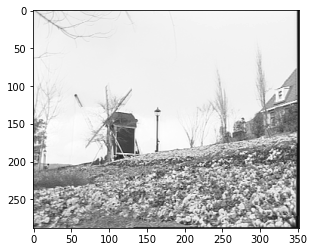

In [8]:
mc_ssd = fracMc(im1,mvf_ssd)
plt.figure(),plt.imshow(mc_ssd,cmap='gray')

Compute the PSNR between the motion compensated and the current images.

What is the definition of PSNR ? Is the PSNR between the motion-compensated image and im2 better than between im1 and im2 ? Explain why.
* The PSNR, or Peak Signal-to-Noise Ratio, is an image quality measure that compares the original image to the processed image. It is expressed in decibels and is calculated using the formula:
$$PSNR = 10log_{10}\left(\dfrac{d^2}{EQM}\right)$$
The PSNR between the motion-compensated image and the target image im2 is better than the PSNR between im1 and im2 because motion compensation aims to minimize the differences between the motion-compensated image and the target image. On the other hand, im1 may not be perfectly aligned with the target image, resulting in larger differences and a lower PSNR.

Code the PSNR function. Compute it using the BM algorithm results, with different parameter values. Explain what you observe.

In [9]:
psnr_ssd = PSNR(im2,mc_ssd)
print(psnr_ssd)

22.706094842153128


### I-1-b Unregularized SAD-based algorithm
Now, we will use the SAD as a metric for the block matching algorithm. To do that, implement the me_sad algorithm. Please note that you function should be very similar to me_ssd, except for the metric (as such, as a starting point, you can copy paste what you have proposed for me_ssd).

In [12]:
mvf_sad,prediction =  me_sad(im2, im1, brow, bcol, search_radius)

Show the motion vector field using the displayMVF function. Do you see any difference with the SSD ? Explain.

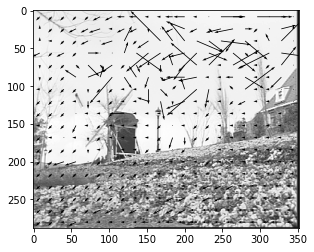

In [13]:
displayMVF(im1,mvf_sad,brow)

Motion compensation: compute the motion compensated image and display it. In addition, compute the PSNR.

Comment the difference observed between SSD and SAD in terms of regularity of the motion vector field, PSNR of the prediction and impact of the block size.

* With the SSD, we have a smoother and less chaotic result than with the SAD.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1543e12e700>)

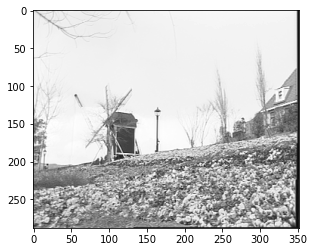

In [15]:
mc_sad = fracMc(im1,mvf_sad)
plt.figure(),plt.imshow(mc_sad,cmap='gray')

In [16]:
psnr_sad = PSNR(im2,mc_sad)
print(psnr_sad)

22.624559609637718


## I-2- Regularized algorithms
Now, we will add a regularization term to the metrics (SSD and then SAD) we previously used.
### I-2-1- Regularized SSD-based algorithm

TO DO : code the regularized SSD-based algorithm.
For the sake of simplicity, the regularizing function is already given. How does it work and what does it compute?

* The regularized SSD-based algorithm uses a regularization term to penalize large weights in the model, in addition to the SSD loss term. It computes the sum of the SSD loss and the regularization term to minimize the total loss.

Try several parameter values, and compare your results with the unregularized algorithms. What can you observe?

* When comparing the results of the regularized algorithm with the unregularized ones, we may observe that the regularized algorithm can largely improve the performance, especially for the sky, because it has very little color differences, and the noise impacts a lot

22.706094842153128


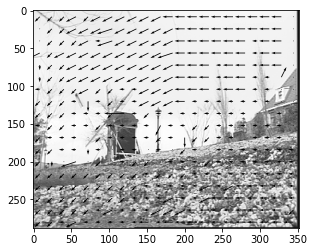

In [17]:
mvf_ssd,prediction =  me_ssd(im2, im1, brow, bcol, search_radius, 1)
displayMVF(im1,mvf_ssd,brow)
psnr_ssd = PSNR(im2,mc_ssd)
print(psnr_ssd)

### I-2-2- Regularized SAD-based algorithm

TO DO : code the regularized SAD-based algorithm.

Try several parameter values, and compare your results with the unregularized algorithms and the regularized SSD-based algorithm.

* The regularized SAD-based algorithm computes the SAD between the reference and the target image, while adding a regularization term to the cost function. It aims to promote smoothness and reduce noise in the estimated motion field.

    By trying different parameter values, we can observe that the regularized SAD-based algorithm can outperform the unregularized SAD-based algorithm in terms of smoothness and acurracy, for the same reason as before. Also, compared to the SSD regularized, motion of the spinning mil is better described

22.624559609637718


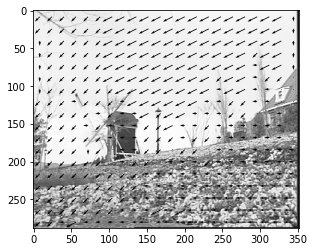

In [18]:
mvf_sad,prediction =  me_sad(im2, im1, brow, bcol, search_radius, 1)
displayMVF(im1,mvf_sad,brow)
psnr_sad = PSNR(im2,mc_sad)
print(psnr_sad)

# Optical flow

You will now implement the Horn and Schunck algorithm to estimate the optic flow. The two images we will consider here have a more local movement vector field, since we are considering small movements in a face.

In [32]:
im1 = loadmat('flower_cif_1.mat')['im1']
im1 = im1.astype('float')
im2 = loadmat('flower_cif_2.mat')['im2']
im2 = im2.astype('float')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1544e89dca0>)

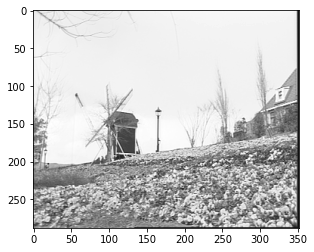

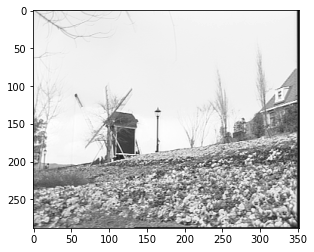

In [33]:
plt.figure(),plt.imshow(im1,cmap='gray')
plt.figure(),plt.imshow(im2,cmap='gray')

Compute the optical flow by filling the gaps in the Horn and Schunck function. You can use the motion field that you estimated before with the block matching algorithms to initialize you algorithm.

As a reminder, the optical flow is implemented by the iterative Horn and Schunck's algorithm:
$$
u^{n+1} = \bar{u}^n - f_x \frac{\bar{u}^n f_x + \bar{v}^n f_y + f_t}{\alpha^2 + \|\nabla f\|^2}
$$
$$
v^{n+1} = \bar{v}^n - f_y \frac{\bar{u}^n f_x + \bar{v}^n f_y + f_t}{\alpha^2 + \|\nabla f\|^2}
$$
where $u^n$ is the value of the $u$ component at the $n$-th iteration, and $\bar{u}$ is the local average of $u$.

In [34]:
brow = 16; bcol=16; search_radius =13;

res = me_sad(im1, im2, brow, bcol, search_radius, 1)

alpha = 100
ite = 100

uInitial = res[0][:,:,0]  #Rem: pay attention to the inversion of the order compare to me_ssd.
vInitial = res[0][:,:,1]
[u, v] = HS(im2, im1, uInitial, vInitial, alpha, ite,blur=1.)

Display the motion field and compute the PSNR. Do you observe any improvement compare to block-matching algorithms? Explain. You can test on both the Akiyo and Flowers images.

* After comparing the PSNR values obtained from both block-matching and HS methods, it appears that the HS method doesn't perform better than the block-matching method for the mill image. In fact, the PSNR obtained using the HS method is lower than that obtained from the block-matching method, indicating that the block-matching method might be more appropriate for this particular scenario. However, for the woman photo, only the face is moving and HS performs better.

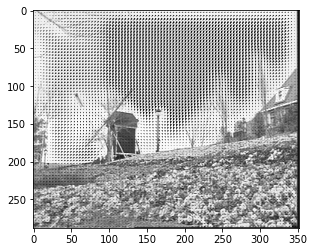

In [35]:
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)

mc_hs = fracMc(im1,mvf_hs)
psnr_hs = PSNR(im2,mc_hs)

In [36]:
psnr_hs

18.618763058750076

## End of TP 1

# III - Parametric estimation
In this last part, we will work on parametric estimation, both using direct and indirect methods.
## III-1- Direct parametric estimation
### III-1-1 Theoretical questions

**Infinite signal**

Let $a: (n,m)\in \mathbb{Z}^2 \rightarrow \mathbb{R}$ be a bi-dimensional signal and $b(n,m)$ a signal of the same type.

Recall the expression of the 2D discrete time Fourier transform (DTFT).

* $$\hat{a}(\nu_x,\nu_y) = \sum_{n=-\infty}^{\infty}\sum_{m=-\infty}^{\infty} a(n,m)\exp(-i2\pi (n\nu_x + m\nu_y))$$

Let us suppose that
$\exists c,d \in \mathbb{Z}^2: \forall n,m \in \mathbb{Z}^2,b(n,m) = a(n+c,m+d)$ (that is, $b$ is a translation of $a$). Compute the DTFT of $b$ as a function of the one of $a$ and of the displacement $(c,d)$.

Show that the ratio between the DTFTs is:
$$
\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \exp(i2\pi (c\nu_x + d \nu_y))
$$

* Using the translation property of DTFT, we have:

$$\begin{aligned} \hat{b}(\nu_x,\nu_y) &= \sum_{n=-\infty}^{\infty}\sum_{m=-\infty}^{\infty} b(n,m)\exp(-i2\pi (n\nu_x + m\nu_y)) \\ &= \sum_{n=-\infty}^{\infty}\sum_{m=-\infty}^{\infty} a(n+c,m+d)\exp(-i2\pi (n\nu_x + m\nu_y)) \\ &= \sum_{n=-\infty}^{\infty}\sum_{m=-\infty}^{\infty} a(n',m')\exp(-i2\pi ((n'-c)\nu_x + (m'-d)\nu_y)) \\ &= \exp(i2\pi (c\nu_x + d \nu_y)) \sum_{n=-\infty}^{\infty}\sum_{m=-\infty}^{\infty} a(n',m')\exp(-i2\pi n'\nu_x - i2\pi m'\nu_y) \\ &= \exp(i2\pi (c\nu_x + d \nu_y))\hat{a}(\nu_x,\nu_y) \end{aligned}$$

    Therefore, the ratio between the DTFTs is:

$$\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \exp(i2\pi (c\nu_x + d \nu_y))$$

**Finite signal**

Now, $a: (n,m) \in \{0,1,...,N-1\}^2 \rightarrow \mathbb{R}$ and $b(n,m)$ are both finite signals. In that case, we use the Discrete Fourier Transform (DFT) rather than the DTFT.

Recall the expression of the DF.
* $$\hat{f}(k_1,k_2) = \sum_{n=0}^{N_1-1} \sum_{m=0}^{N_2-1} f(n,m) \exp\left(-\frac{2i\pi}{N_1}nk_1\right) \exp\left(-\frac{2i\pi}{N_2}mk_2\right)$$

Under which hypotheses is the ratio between $a$'s and $b$'s DFT a linear phase signal:
$$
\frac{\hat{A}(k_x,k_y)}{\hat{B}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N^2}\right)
$$

* Under the assumption that $a$ and $b$ have the same dimensions and are zero-padded so that their size becomes $N\times N$ where $N$ is a power of 2, and that there exists an integer translation vector $(c,d)$ such that $b(n,m)=a(n+c,m+d)$ for all $n,m$, the ratio between the DFTs of $a$ and $b$ is a linear phase signal

### III-1-2 Practical part
First, start to work on the 'ball.mat' image. We will apply a translation to this image and try to estimate the parameter of the translation.

Try by either adding of not some noise into the image.

In [37]:
im1 = loadmat('ball.mat')['im1']
im1 = im1.astype('float')

#im1 = loadmat('lena.mat')['im1']
#im1 = im1.astype('float')

N, M = np.shape(im1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1544e669fd0>)

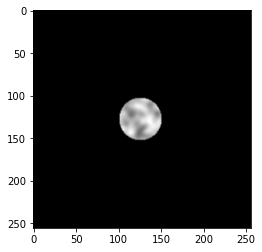

In [38]:
# Potentially add noise to the image
sigma = 0
im1 = im1 + sigma*np.random.randn(np.shape(im1)[0],np.shape(im1)[1])
plt.figure(),plt.imshow(im1,cmap='gray')

In the following, we apply a translation to the image.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1544e54b640>)

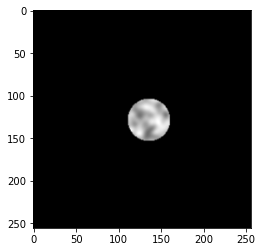

In [41]:
horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
#B = np.zeros((2,2))

im2 = applyAffineMotion(im1,b)
plt.figure(),plt.imshow(im2,cmap='gray')

Compute the FFT of the two images. Using the indications given in the theroretical part, describe a method with which you can find the parameters of the translation from the two FFTs.
* To find the parameters of the translation between the two images, we can use cross-correlation in the frequency domain. The cross-correlation theorem states that the cross-correlation of two signals in the time domain is equivalent to the multiplication of their Fourier transforms in the frequency domain.

In [50]:
IM1 = np.fft.fft2(im1)
IM2 = np.fft.fft2(im2)

In [51]:
phi = angle2D(IM1/IM2)

Display phi. Is it a linear plane and why?
* The phase difference phi between the two FFTs is a linear plane because there is a pure translation between the two images. This is because the phase of the Fourier transform of a translated signal is a linear function of the frequency components, as shown in the theoretical part.

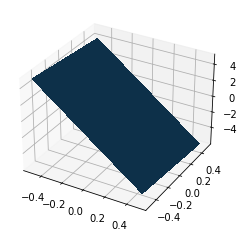

In [52]:
fx, fy = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1)/M, np.arange(-(N-1)/2,(N-1)/2+1)/N)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(fx, fy, phi, linewidth=0, antialiased=False)

Translation estimation: to estimate the parameters of the translation, we are now looking for the slope of the plane.

Method 1: estimate it using the median of the gradient. To do that, complete the gradient function.

In [53]:
gx, gy = gradient(phi,1/M,1/N)
GX = np.median(gx)
GY = np.median(gy)

TypeError: unsupported operand type(s) for /: 'ellipsis' and 'int'

In [15]:
print(GX)
print(GY)

9.034491454891963
-0.374093473037739


Method 2: the code below computes the least Square planar approximation of phi, enabling you how to estimate the parameters of the translation. Explain how it works.

In [16]:
phi = phi-phi[int(N/2+2), int(M/2+2)]
t = medianFilter(phi,1)

In [17]:
A = np.zeros((np.shape(fx)[0]*np.shape(fx)[1],2))
A[:,0] = fx.reshape(np.shape(fx)[0]*np.shape(fx)[1])
A[:,1] = fy.reshape(np.shape(fy)[0]*np.shape(fy)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
bEst = np.dot(np.linalg.pinv(A),b)

In [18]:
print(bEst)

[7.90761829 0.01702052]


Relaunch the above code:
- with and without noise
- with the lena image, instead of the ball image.

Each time, are you able to correctly estimate the translation? Why? Comment your results.

# III-2-Indirect parametric estimation
In this last part, we will perform indirect parametric estimation. The movement vector field will be estimated by 1) block matching; 2) optic flow. Each time, you will then estimate the translation by taking the median of the estimated vector field.

Perform the experiment without and with noise (you can then take sigma = 2).

Finally, compare all the parametric estimation methods when the translation values are not integer.

10.0
1.0


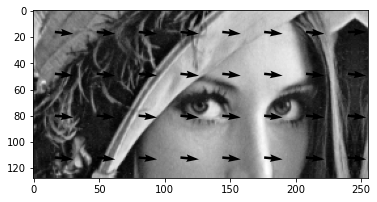

In [19]:
lamb = 0
mvf,prediction = me_ssd(im2,im1,32,32,10,lamb)
displayMVF(im2,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)

Estimation with optic flow

5.849325226370629
0.49470959851673235


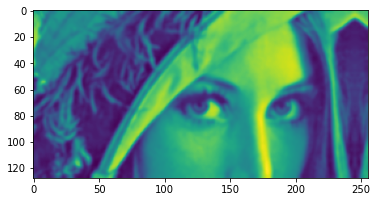

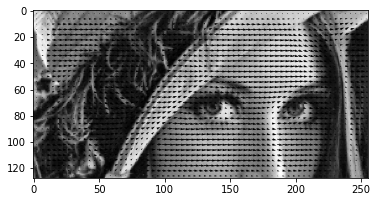

In [20]:
alpha = 100
ite = 100
uInitial = mvf[:,:,1]
vInitial = mvf[:,:,0]
u, v = HS(im2, im1, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)